In [ ]:
#trachea, bronchus and lung desease

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
from scipy.optimize import curve_fit

In [29]:
# Load the clean 2005 data CSV file into a Pandas DataFrame
clean_2005_DD_df = pd.read_csv("cleaned_data_csv_files/clean_output_2005_DD_df.csv", low_memory=False)

# Display sample data
clean_2005_DD_df.head()

,Death in United States 2005,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
0,0,45,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,Malignant melanoma of skin (C43),NaN
1,1,61,Years,Male,White,Divorced,Saturday,January,"Hospital, clinic or Medical Center",Natural,Emphysema (J43),NaN
2,2,79,Years,Female,White,Divorced,Sunday,January,Nursing home/long term care,Natural,Other cerebrovascular diseases and their seque...,NaN
3,3,50,Years,Male,White,"Never married, single",Wednesday,January,"Hospital, clinic or Medical Center",Natural,Diabetes mellitus (E10-E14),NaN
4,4,68,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN


In [30]:
#Reset index to use patient data ID numbers from original CSV, not arbitrary index assignments
clean_2005_DD_df = clean_2005_DD_df.drop(columns=["Death in United States 2005"])
clean_2005_DD_df


,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
0,45,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,Malignant melanoma of skin (C43),NaN
1,61,Years,Male,White,Divorced,Saturday,January,"Hospital, clinic or Medical Center",Natural,Emphysema (J43),NaN
2,79,Years,Female,White,Divorced,Sunday,January,Nursing home/long term care,Natural,Other cerebrovascular diseases and their seque...,NaN
3,50,Years,Male,White,"Never married, single",Wednesday,January,"Hospital, clinic or Medical Center",Natural,Diabetes mellitus (E10-E14),NaN
4,68,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1719610,47,Years,Male,White,Marital Status unknown,Saturday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719611,78,Years,Female,White,"Never married, single",Monday,September,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719612,32,Years,Female,White,Marital Status unknown,Tuesday,December,Decedent’s home,Natural,Diabetes mellitus (E10-E14),NaN
1719613,70,Years,Male,Black,Marital Status unknown,Sunday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN


In [31]:
#Create a new dataframe that only includes the data for individuals with a cause of death related to
selected_entries_lungs = ["Of trachea, bronchus and lung (C33-C34)",
                          "Other chronic obstructive pulmonary disease (J44)"]
            
lungs_disease_df = clean_2005_DD_df[clean_2005_DD_df['358_cause_recode_text'].isin(selected_entries_lungs)]
lungs_disease_df

,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
4,68,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN
7,61,Years,Male,American Indian (includes Aleuts and Eskimos),"Never married, single",Friday,January,"Hospital, clinic or Medical Center",Natural,Other chronic obstructive pulmonary disease (J44),NaN
12,78,Years,Male,White,Divorced,Monday,January,"Hospital, clinic or Medical Center",Natural,Other chronic obstructive pulmonary disease (J44),NaN
15,59,Years,Female,White,Married,Wednesday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN
19,90,Years,Female,White,Widowed,Monday,January,Nursing home/long term care,Natural,Other chronic obstructive pulmonary disease (J44),NaN
...,...,...,...,...,...,...,...,...,...,...,...
1718999,44,Years,Female,White,Divorced,Friday,December,Decedent’s home,Natural,Other chronic obstructive pulmonary disease (J44),NaN
1719008,50,Years,Female,White,"Never married, single",Wednesday,December,Decedent’s home,Natural,Other chronic obstructive pulmonary disease (J44),NaN
1719151,49,Years,Female,Black,Married,Wednesday,December,Decedent’s home,Natural,"Of trachea, bronchus and lung (C33-C34)",NaN
1719448,78,Years,Female,White,"Never married, single",Thursday,December,Other,Natural,"Of trachea, bronchus and lung (C33-C34)",NaN


In [60]:
# number of deaths by sex
gender_count = lungs_disease_df['sex_text']
male_count = len(lungs_disease_df[lungs_disease_df['sex_text'] == 'Male'])
female_count = len(lungs_disease_df[lungs_disease_df['sex_text'] == 'Female'])

print(f"Number of males in the DataFrame: {male_count}")
print(f"Number of females in the DataFrame: {female_count}")

Number of males in the DataFrame: 97520
Number of females in the DataFrame: 85465


In [77]:
# Find average lungs disease by Age
average_male_count = lungs_disease_df[lungs_disease_df['sex_text'] == 'Male']['c'].mean()
average_female_count = lungs_disease_df[lungs_disease_df['sex_text'] == 'Female']['detail_age'].mean()

print(f"Average age for males: {average_male_count}")
print(f"Average age for females: {average_female_count}")

Average age for males: 72.43953035274815
Average age for females: 74.16527233370385


In [79]:
# Men and Women deaths in 70 + of age
deaths_70plus_male = lungs_disease_df[(lungs_disease_df['detail_age'] >= 70) & (lungs_disease_df['sex_text'] == 'Male') ]
deaths_70plus_female = lungs_disease_df[(lungs_disease_df['detail_age'] >= 70) & (lungs_disease_df['sex_text'] == 'Female') ]

num_deaths_70plus_male = len(deaths_70plus_male)
num_deaths_70plus_female = len(deaths_70plus_female)

print(f"Number of deaths for males aged 70 and above: {num_deaths_70plus_male}")
print(f"Number of deaths for females aged 70 and above: {num_deaths_70plus_female}")

Number of deaths for males aged 70 and above: 61648
Number of deaths for females aged 70 and above: 58421


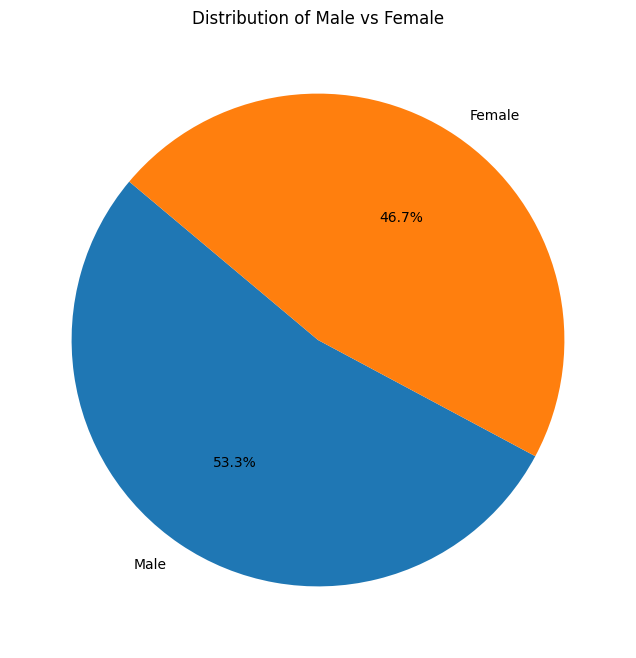

In [32]:
#Create a pie chart showing the percentage of male vs female patients whose cause of death was lungs disease

# Calculate the count of male and female
lungs_gender_counts = lungs_disease_df['sex_text'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(lungs_gender_counts, labels=lungs_gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Male vs Female')
plt.show()

In [33]:
#Determine if the difference between males and females is statistically significant
#use t-test, Anova , chi2

Conclusion:
Based on the provided information, it appears that there is a notable difference in the mortality rates due to lung diseases between men and women, particularly in their seventies. Here's a detailed breakdown of the conclusion:

Peak Age Difference: The peak age for lung disease-related deaths shows a significant difference between men and women, with the disparity being most noticeable in their seventies. This implies that individuals in their seventies, especially men, are more susceptible to lung diseases leading to mortality.

Lung Disease Mortality: The data indicates that a considerable number of deaths among both men and women are attributed to lung diseases. However, there is a disparity in the numbers, with a higher mortality rate among men. Specifically, 61,648 men and 58,421 women died due to lung diseases. This suggests that lung diseases contribute significantly to mortality, especially among men.

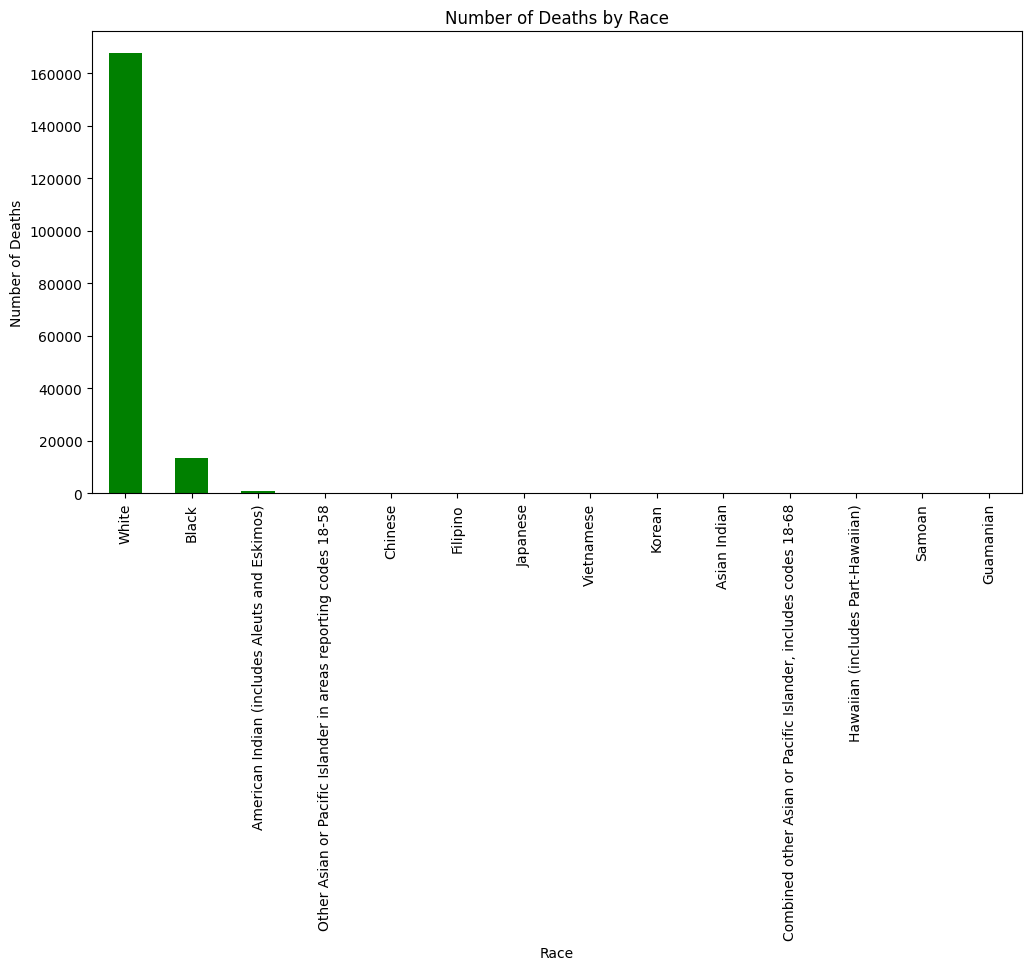

In [81]:
# Create a histogram of deaths due to Lung disease by race

plt.figure(figsize=(12, 6))
lungs_disease_df['race_text'].value_counts().plot(kind='bar', color='green')
plt.title('Number of Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Determine if the difference between males and females is statistically significant
#use ANOVA test

In [ ]:
#Use this cell to describe findings


/var/folders/q0/f73hnm6s6h19dwjnmq7q3thh0000gn/T/ipykernel_44529/902500492.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = pd.cut(filtered_df['detail_age'], bins=age_bins, labels=age_bins[:-1])
/var/folders/q0/f73hnm6s6h19dwjnmq7q3thh0000gn/T/ipykernel_44529/902500492.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = filtered_df.groupby('age_group').size()


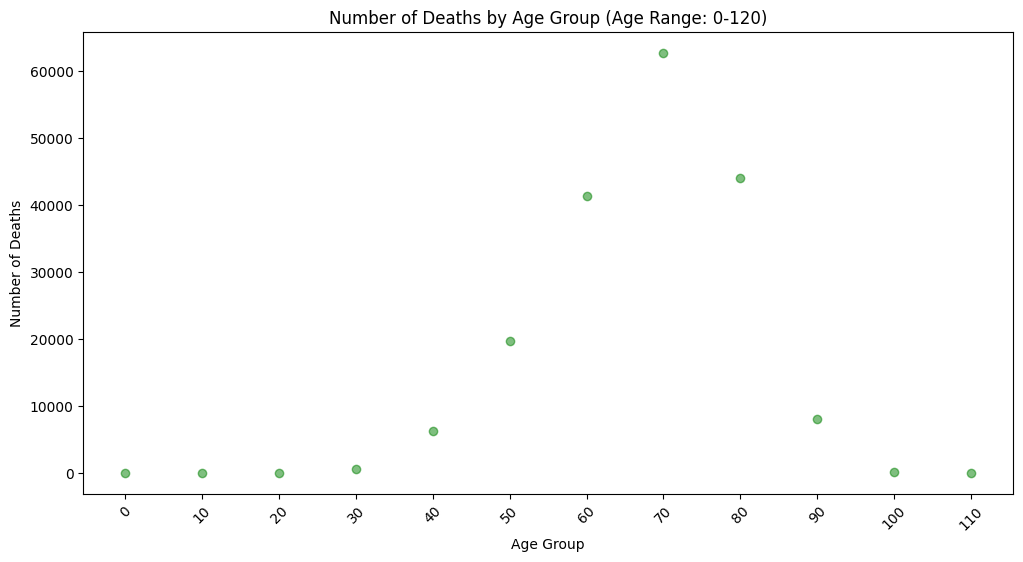

In [45]:
# Create a scatter plot of deaths by age

# Filter out entries with age greater than 120 (Age Unknown populates as a number in the thousands)
filtered_lungs_df = lungs_disease_df[lungs_disease_df['detail_age'] <= 120]

# Define age groups for aggregation
# Create age bins of width 10
age_bins = np.arange(0, 121, 10)  

# Create a new column 'age_group' based on the age bins
filtered_df['age_group'] = pd.cut(filtered_df['detail_age'], bins=age_bins, labels=age_bins[:-1])

# Group by age group and count the number of deaths in each group
age_group_counts = filtered_df.groupby('age_group').size()

# Convert age_group_counts index to numeric
age_group_counts.index = pd.to_numeric(age_group_counts.index)

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='green', alpha=0.5)
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.show()

R-squared value: 0.07174272744057879


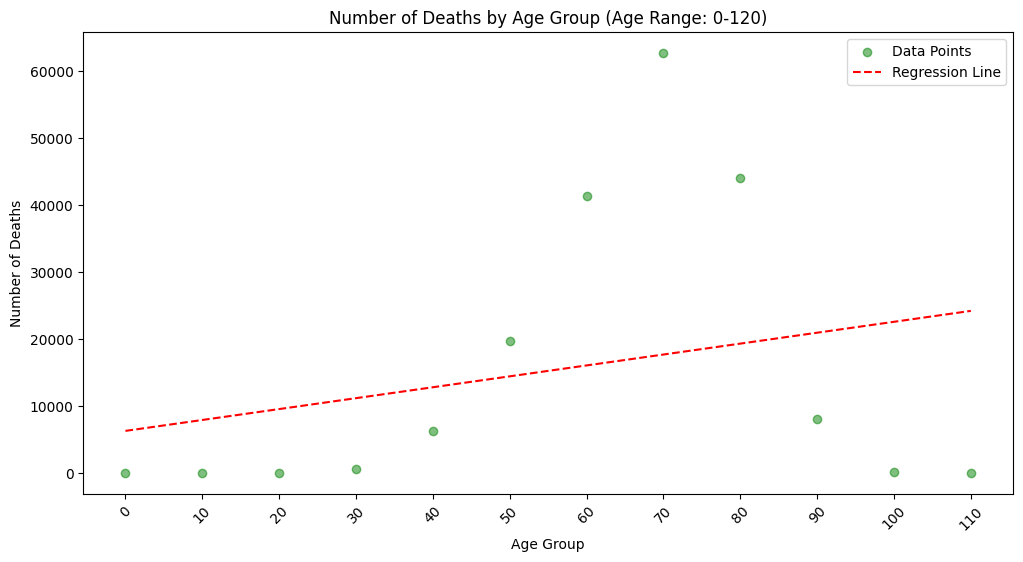

In [51]:
#Determine if there is a relationship between age and death due to lungs disease using regression analysis

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(age_group_counts.index, age_group_counts)
regression_line = slope * age_group_counts.index + intercept

# Calculate R-squared value
r_squared = r_value ** 2
print(f"R-squared value: {r_squared}")

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='green', alpha=0.5, label='Data Points')
plt.plot(age_group_counts.index, regression_line, color='red', linestyle='--', label='Regression Line')
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.legend()
plt.show()

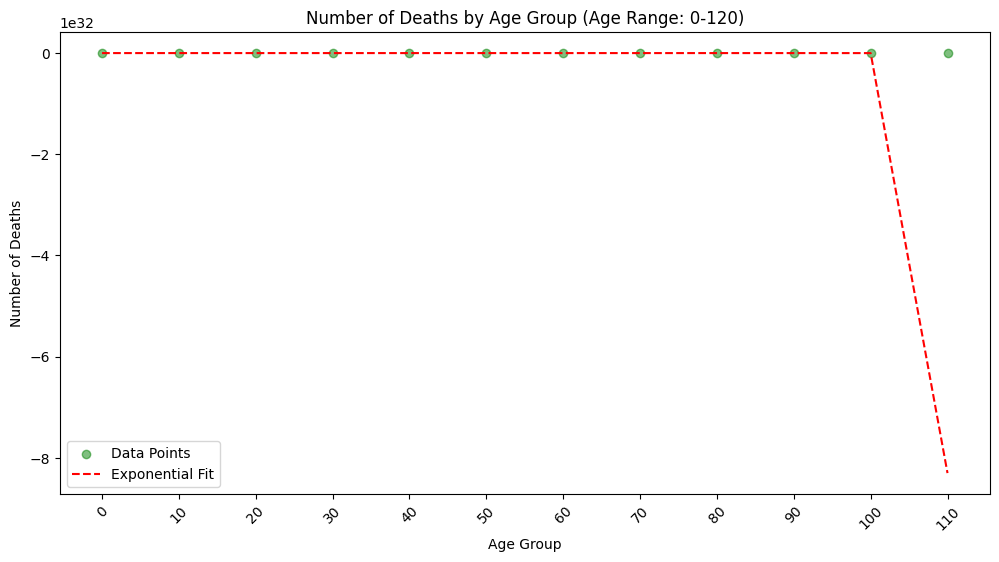

In [53]:
#Linear regression analysis does not appear to fit this curved data trend
#Attempt to identify a different curve fit analysis

# Define an exponential function for curve fitting
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Perform curve fitting using exponential function
popt, pcov = curve_fit(exponential_func, age_group_counts.index, age_group_counts)

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='green', alpha=0.5, label='Data Points')
plt.plot(age_group_counts.index, exponential_func(age_group_counts.index, *popt), color='red', linestyle='--', label='Exponential Fit')
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.legend()
plt.show()

# Conclusion

Other Contributing Factors: While lung diseases are a significant cause of mortality among both men and women, other common illnesses may also contribute to mortality rates. The data suggests that certain illnesses may be more aggressive among men compared to women, leading to higher mortality rates. However, it's important to note that women also face mortality risks from other illnesses, albeit potentially less severe than those affecting men.

Life Expectancy: Despite the differences in mortality rates and causes of death, women tend to have a higher life expectancy compared to men. This suggests that while women may face mortality risks from various illnesses, they have a higher likelihood of living into their eighties compared to men.

Overall, the conclusion highlights the significant impact of lung diseases on mortality rates, particularly among individuals in their seventies. It also underscores the importance of considering gender differences in understanding mortality patterns and identifying potential contributing factors to address health disparities.